In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
#要用上面那句
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
val_spl , train_spl = tfds.Split.TRAIN.subsplit([10,90])
train_data , info =tfds.load('cifar10',split = train_spl , with_info=True)

val_data = tfds.load('cifar10',split=train_spl)

test_data = tfds.load('cifar10',split=tfds.Split.TEST)

In [5]:
label_dict = dict(enumerate(info.features['label'].names))
label_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [5]:
train_dict={}
for data in train_data:
    label = data['label'].numpy()
    train_dict[label] = train_dict.setdefault(label,0)+1
print(train_dict)

{9: 4506, 2: 4491, 8: 4517, 7: 4515, 5: 4519, 3: 4497, 1: 4473, 6: 4509, 4: 4481, 0: 4492}


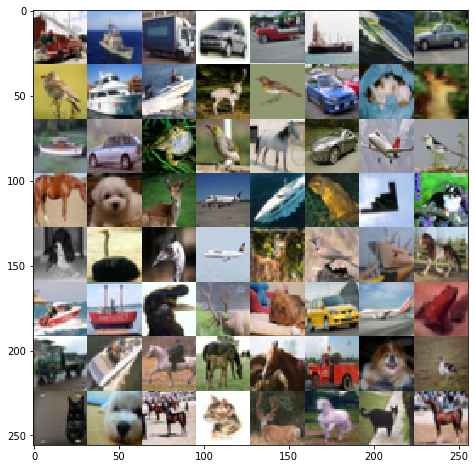

In [6]:
output = np.zeros((32*8,32*8,3),dtype=np.uint8)
row = 0

for data in train_data.batch(8).take(8):
    output[:,row*32:(row+1)*32] = np.vstack(data['image'].numpy())
    row +=1
    
plt.figure(figsize=(8,8))
plt.imshow(output)

In [7]:
def parse_fn(dataset):
    
    x = tf.cast(dataset['image'], tf.float32)/255.
    y = tf.one_hot(dataset['label'],10)
    return x,y

In [8]:
AUTOTUNE =tf.data.experimental.AUTOTUNE
batch_size = 64
train_num = int(info.splits['train'].num_examples/10)*9


train_data = train_data.shuffle(train_num)
train_data = train_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)


val_data = val_data.shuffle(train_num)
val_data = val_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
val_data = val_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)


test_data = test_data.shuffle(train_num)
test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [10]:
inputs = keras.Input(shape=(32,32,3))
x = layers.Flatten()(inputs)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(10,activation='softmax')(x)


model_1 = keras.Model(inputs,outputs,name='modle-1')
model_1.summary()

Model: "modle-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1315

In [9]:
#模型儲存目錄
model_dir = 'lab4-logs/midels/'
#os.makedirs(model_dir)
#FileExistsError: [WinError 183] 當檔案已存在時，無法建立該檔案。: 'lab4-logs/midels/'

In [16]:
#儲存回調函數
log_dir = os.path.join('lab4-logs','model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
#最佳
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+'Bestmodel-1.h5',
                                            monitor='val_categorical_accuracy',
                                            save_best_only=True,
                                            mode='max')

In [17]:
#儲存回調函數
log_dir = os.path.join('lab4-logs','model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
#最佳
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+'Bestmodel-1.h5',
                                            monitor='val_categorical_accuracy',
                                            save_best_only=True,
                                            mode='max')

In [18]:
model_1.compile(keras.optimizers.Adam(),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

In [19]:
history = model_1.fit(train_data,
                     epochs=100,
                     validation_data =val_data,
                     callbacks=[model_cbk,model_mckp])

Epoch 1/100
704/704 [==============================] - 16s 23ms/step - loss: 2.2202 - categorical_accuracy: 0.1442 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
704/704 [==============================] - 12s 17ms/step - loss: 2.1906 - categorical_accuracy: 0.1537 - val_loss: 2.1078 - val_categorical_accuracy: 0.1896
Epoch 3/100
697/704 [============================>.] - ETA: 0s - loss: 2.1892 - categorical_accuracy: 0.1527WARNING:tensorflow:Can save best model only with val_categorical_accuracy available, skipping.


704/704 [==============================] - 10s 14ms/step - loss: 2.1892 - categorical_accuracy: 0.1525


KeyboardInterrupt: 

In [20]:
inputs = keras.Input(shape=(32,32,3))
x=layers.Conv2D(64, (3,3),activation='relu')(inputs)
x=layers.MaxPool2D()(x)
x=layers.Conv2D(128, (3,3),activation='relu')(x)
x=layers.Conv2D(256, (3,3),activation='relu')(x)
x=layers.Conv2D(128, (3,3),activation='relu')(x)
x=layers.Conv2D(64, (3,3),activation='relu')(x)
x= layers.Flatten()(x)
x= layers.Dense(64,activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10,activation='softmax')(x)


model_2 = keras.Model(inputs , outputs, name='model-2')
model_2.summary()

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          7379

In [21]:
#儲存回調函數
log_dir = os.path.join('lab4-logs','model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
#最佳
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+'Bestmodel-2.h5',
                                            monitor='val_categorical_accuracy',
                                            save_best_only=True,
                                            mode='max')

In [22]:
model_2.compile(keras.optimizers.Adam(),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

In [23]:
history_2 = model_2.fit(train_data,
                        epochs=100,
                        validation_data = val_data,
                        callbacks=[model_cbk,model_mckp])

Epoch 1/100
704/704 [==============================] - 25s 36ms/step - loss: 1.9196 - categorical_accuracy: 0.2744 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
704/704 [==============================] - 21s 30ms/step - loss: 1.5533 - categorical_accuracy: 0.4328 - val_loss: 1.2984 - val_categorical_accuracy: 0.5234
Epoch 3/100
704/704 [==============================] - 22s 31ms/step - loss: 1.3591 - categorical_accuracy: 0.5130 - val_loss: 1.1053 - val_categorical_accuracy: 0.6028
Epoch 4/100
704/704 [==============================] - 21s 30ms/step - loss: 1.2319 - categorical_accuracy: 0.5643 - val_loss: 1.1154 - val_categorical_accuracy: 0.6068
Epoch 5/100
704/704 [==============================] - 21s 30ms/step - loss: 1.1284 - categorical_accuracy: 0.6034 - val_loss: 0.9761 - val_categorical_accuracy: 0.6527
Epoch 6/100
704/704 [==============================] - 21s 30ms/step - loss: 1.0417 - categorical_accuracy: 0.6338 - val_loss: 0.8966 - val_categor

704/704 [==============================] - 22s 32ms/step - loss: 0.0960 - categorical_accuracy: 0.9720 - val_loss: 0.0236 - val_categorical_accuracy: 0.9923
Epoch 98/100
704/704 [==============================] - 22s 32ms/step - loss: 0.0964 - categorical_accuracy: 0.9716 - val_loss: 0.0226 - val_categorical_accuracy: 0.9930
Epoch 99/100
704/704 [==============================] - 22s 32ms/step - loss: 0.0994 - categorical_accuracy: 0.9705 - val_loss: 0.0481 - val_categorical_accuracy: 0.9858
Epoch 100/100
704/704 [==============================] - 22s 31ms/step - loss: 0.0907 - categorical_accuracy: 0.9731 - val_loss: 0.0180 - val_categorical_accuracy: 0.9942


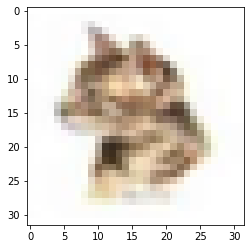

In [10]:
x = 3
y= 7 
image_test = output[y*32:(y+1)*32,x*32:(x+1)*32,:]
plt.imshow(image_test)

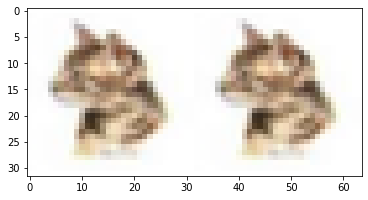

In [11]:
def flip(x):
    x = tf.image.random_flip_left_right(x) #隨機左右翻轉
    return x


image_2=flip(image_test)

image = np.hstack((image_test , image_2))

plt.imshow(image)

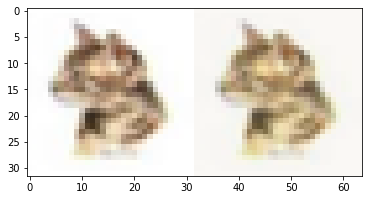

In [12]:
def color(x):
    x = tf.image.random_hue(x,0.08)
    x = tf.image.random_saturation(x,0.6,1.6)
    x = tf.image.random_brightness(x,0.05)
    x = tf.image.random_contrast(x,0.7,1.3)
    return x


image_2 = color(image_test)
image = np.hstack((image_test, image_2))
plt.imshow(image)

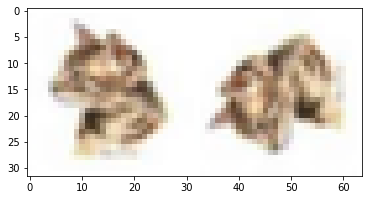

In [13]:
def rotate(x):
    x = tf.image.rot90(x,tf.random.uniform(shape=[],minval=1,maxval=4,dtype=tf.int32))
    return x

image_2 = rotate(image_test)

image =np.hstack((image_test,image_2))
plt.imshow(image)

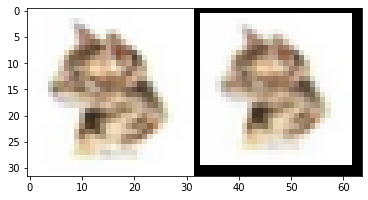

In [14]:
def zoom(x,scale_min=0.6 , scale_max=1.4):
    h,w,c = x.shape
    scale = tf.random.uniform([],scale_min , scale_max)
    sh = h*scale
    sw = w*scale
    x = tf.image.resize(x,(sh,sw))
    x = tf.image.resize_with_crop_or_pad(x,h,w)
    return x

image_2 = zoom(image_test)
image_2 = tf.cast(image_2,dtype=tf.uint8)
image =np.hstack((image_test,image_2))
plt.imshow(image)

In [15]:
train_data = tfds.load('cifar10',split=train_spl)

In [16]:
def parse_aug(dataset):
    x = tf.cast(dataset['image'],tf.float32)/255.
    x = flip(x)
    x = tf.cond(tf.random.uniform([],0,1)>0.5 ,lambda: color(x), lambda:x)
    x = tf.cond(tf.random.uniform([],0,1)>0.75 ,lambda :rotate(x),lambda:x)
    x = tf.cond(tf.random.uniform([],0,1)>0.5 ,lambda :zoom(x),lambda:x)
    y = tf.one_hot(dataset['label'],10)
    return x , y

In [17]:
train_data = train_data.shuffle(train_num)

train_data = train_data.map(map_func = parse_aug , num_parallel_calls=AUTOTUNE)

train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

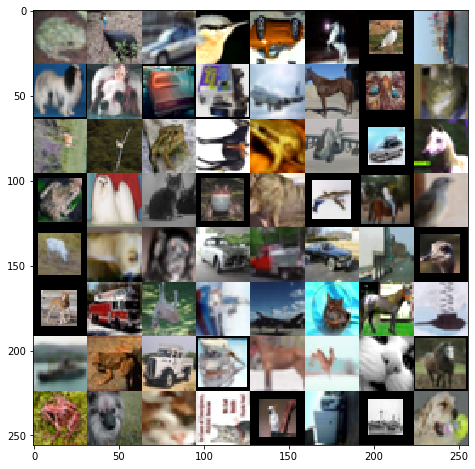

In [18]:
for images,labels in train_data.take(1):
    images = images.numpy()
    
output = np.zeros((32*8,32*8,3))

for i in range(8):
    for j in range(8):
        output[i*32:(i+1)*32,j*32:(j+1)*32,:] = images[i*8+j]
plt.figure(figsize=(8,8))

plt.imshow(output)


In [19]:
inputs = keras.Input(shape=(32,32,3))
x=layers.Conv2D(64, (3,3),activation='relu')(inputs)
x=layers.MaxPool2D()(x)
x=layers.Conv2D(128, (3,3),activation='relu')(x)
x=layers.Conv2D(256, (3,3),activation='relu')(x)
x=layers.Conv2D(128, (3,3),activation='relu')(x)
x=layers.Conv2D(64, (3,3),activation='relu')(x)
x= layers.Flatten()(x)
x= layers.Dense(64,activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10,activation='softmax')(x)


model_3 = keras.Model(inputs , outputs, name='model-3')
model_3.summary()

Model: "model-3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          7379

In [20]:
#儲存回調函數
log_dir = os.path.join('lab4-logs','model-3')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
#最佳
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+'Bestmodel-3.h5',
                                            monitor='val_categorical_accuracy',
                                            save_best_only=True,
                                            mode='max')

In [21]:
model_3.compile(keras.optimizers.Adam(),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

In [22]:
history_3 = model_3.fit(train_data,
                        epochs=100,
                        validation_data=val_data,
                        callbacks=[model_cbk,model_mckp])

Epoch 1/100
704/704 [==============================] - 26s 36ms/step - loss: 2.0770 - categorical_accuracy: 0.2084 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
704/704 [==============================] - 22s 32ms/step - loss: 1.8798 - categorical_accuracy: 0.3065 - val_loss: 1.6444 - val_categorical_accuracy: 0.4110
Epoch 3/100
704/704 [==============================] - 23s 33ms/step - loss: 1.7578 - categorical_accuracy: 0.3550 - val_loss: 1.4691 - val_categorical_accuracy: 0.4622
Epoch 4/100
704/704 [==============================] - 22s 32ms/step - loss: 1.6549 - categorical_accuracy: 0.3997 - val_loss: 1.3504 - val_categorical_accuracy: 0.5144
Epoch 5/100
704/704 [==============================] - 23s 33ms/step - loss: 1.5864 - categorical_accuracy: 0.4339 - val_loss: 1.2528 - val_categorical_accuracy: 0.5413
Epoch 6/100
704/704 [==============================] - 22s 32ms/step - loss: 1.5140 - categorical_accuracy: 0.4590 - val_loss: 1.1433 - val_categor

Epoch 97/100
704/704 [==============================] - 22s 31ms/step - loss: 0.7863 - categorical_accuracy: 0.7401 - val_loss: 0.3772 - val_categorical_accuracy: 0.8751
Epoch 98/100
704/704 [==============================] - 22s 31ms/step - loss: 0.7806 - categorical_accuracy: 0.7411 - val_loss: 0.3455 - val_categorical_accuracy: 0.8863
Epoch 99/100
704/704 [==============================] - 22s 31ms/step - loss: 0.7862 - categorical_accuracy: 0.7401 - val_loss: 0.3469 - val_categorical_accuracy: 0.8868
Epoch 100/100
704/704 [==============================] - 22s 31ms/step - loss: 0.7754 - categorical_accuracy: 0.7437 - val_loss: 0.3528 - val_categorical_accuracy: 0.8856


In [26]:
#model_1.load_weights('lab4-logs/models/Bestmodel-1.h5')
#model_2.load_weights('lab4-logs/models/Bestmodel-2.h5')
model_3.load_weights('lab4-logs/midels/Bestmodel-3.h5')

In [27]:
#loss_1,acc_1 = model_1.evaluate(test_data)
#loss_2,acc_2 = model_2.evaluate(test_data)
loss_3,acc_3 = model_3.evaluate(test_data)

157/157 [==============================] - 2s 15ms/step - loss: 0.6186 - categorical_accuracy: 0.8004174 - categoric


In [29]:
#loss = [loss_1,loss_2,loss_3]
#acc =[acc_1,acc_2,acc_3]
#dict = {'Accuracy':acc,'Loss':loss}
#pd.DataFrame(dict)
print(loss_3 , acc_3)

0.6186332696942007 0.8004


In [33]:
%load_ext tensorboard

In [35]:
%reload_ext tensorboard

In [36]:
tensorboard --logdir lab4-logs

Reusing TensorBoard on port 6006 (pid 9328), started 0:01:35 ago. (Use '!kill 9328' to kill it.)